In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [32]:
data = pd.read_csv('BCdata.csv')

In [33]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [35]:
data.drop(['Unnamed: 32',"id"], axis=1, inplace=True)
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]

x_data= data.drop(['diagnosis'], axis=1)

X = x_data.values
Y = data.diagnosis.values
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 1)

regressor = LogisticRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

pd.DataFrame({'Actual': y_test,
              'prediction': y_pred})



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


,Actual,prediction
0,0,0
1,1,1
2,0,0
3,1,1
4,1,1
...,...,...
109,1,1
110,1,0
111,0,0
112,0,1


In [37]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.7738095238095237

In [38]:
import seaborn as sns



In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 1)


In [40]:
def sigmoid(z):
    return 1.0/(1 + np.exp(-z))

In [41]:
def loss(y, y_hat):
    loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
    return loss

In [42]:
def gradients(X, y, y_hat):
    
    # X --> Input.
    # y --> true/target value.
    # y_hat --> hypothesis/predictions.
    # w --> weights (parameter).
    # b --> bias (parameter).
    
    # m-> number of training examples.
    m = X.shape[0]
    
    # Gradient of loss w.r.t weights.
    dw = (1/m)*np.dot(X.T, (y_hat - y))
    
    # Gradient of loss w.r.t bias.
    db = (1/m)*np.sum((y_hat - y)) 
    
    return dw, db



In [43]:
def normalize(X):
    
    # X --> Input.
    
    # m-> number of training examples
    # n-> number of features 
    m, n = X.shape
    
    # Normalizing all the n features of X.
    for i in range(n):
        X = (X - X.mean(axis=0))/X.std(axis=0)
        
    return X

In [44]:
def train(X, y, bs, epochs, lr):
    
   
    m, n = X.shape
    
    w = np.zeros((n,1))
    b = 0
    
    y = y.reshape(m,1)
    
    x = normalize(X)
    
    losses = []
    
    for epoch in range(epochs):
        for i in range((m-1)//bs + 1):
            
            # Defining batches. SGD.
            start_i = i*bs
            end_i = start_i + bs
            xb = X[start_i:end_i]
            yb = y[start_i:end_i]
            
            # Calculating hypothesis/prediction.
            y_hat = sigmoid(np.dot(xb, w) + b)
            
            # Getting the gradients of loss w.r.t parameters.
            dw, db = gradients(xb, yb, y_hat)
            
            # Updating the parameters.
            w -= lr*dw
            b -= lr*db
        
        # Calculating loss and appending it in the list.
        l = loss(y, sigmoid(np.dot(X, w) + b))
        losses.append(l)
        
    # returning weights, bias and losses(List).
    return w, b, losses

In [45]:
def predict(X):
    
    # X --> Input.
    
    # Normalizing the inputs.
    x = normalize(X)
    
    # Calculating presictions/y_hat.
    preds = sigmoid(np.dot(X, w) + b)
    
    # Empty List to store predictions.
    pred_class = []
    # if y_hat >= 0.5 --> round up to 1
    # if y_hat < 0.5 --> round up to 1
    pred_class = [1 if i > 0.5 else 0 for i in preds]
    
    return np.array(pred_class)

In [46]:
w, b, l = train(X_train, y_train, bs=100, epochs=1000, lr=0.15)
# Plotting Decision Boundary


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


In [47]:
def accuracy(y, y_hat):
    accuracy = np.sum(y == y_hat) / len(y)
    return accuracy


In [48]:
accuracy(y_test, predict(X_test))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


0.9385964912280702

In [49]:
pd.DataFrame({'Actual':y_test,
              'Prediction':predict(X_test)})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


,Actual,Prediction
0,0,0
1,1,1
2,0,0
3,1,1
4,1,1
...,...,...
109,1,1
110,1,0
111,0,0
112,0,0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


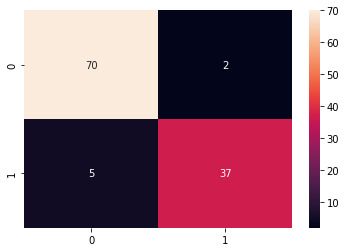

In [50]:
from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(y_test, predict(X_test))
 
sb.heatmap(cfm, annot = True);

In [57]:
test =[[15.22,	11.38,	125.70,	1004.0,	0.11820,	0.27990,	0.3030,	0.14755,	0.2541, 0.07846, 1.075, 0.8060, 6.689, 150.4, 0.006399, 0.04904,0.05373, 0.01587, 0.03003, 0.006193, 21.38,	20.33,	187.60,	2014.0,	0.1799,	0.6476,	0.8119,	0.2984,	0.4841,	0.11890]]
test = np.array(test)
predict(test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


array([1])